#Face Classification by Emotion


Adapted from fastai lesson 0 notebook

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

possible fix for ImageCleaner bug -- install conda? currently conda is not recognized command


In [2]:

# conda update conda
# conda install -c fastai fastai

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
ls

00_notebook_tutorial.ipynb        lesson3-planet.ipynb
Class5Activity.ipynb              lesson4-collab.ipynb
data@                             lesson4-tabular.ipynb
faces 1.0!.ipynb                  lesson5-sgd-mnist.ipynb
images/                           lesson6-pets-more.ipynb
initial_fastai_model! 3_12.ipynb  lesson6-rossmann.ipynb
initial_fastai_model!.ipynb       lesson7-human-numbers.ipynb
lesson1-pets.ipynb                lesson7-resnet-mnist.ipynb
lesson2-download.ipynb            lesson7-superres-gan.ipynb
lesson2-sgd.ipynb                 lesson7-superres-imagenet.ipynb
lesson3-camvid-tiramisu.ipynb     lesson7-superres.ipynb
lesson3-camvid.ipynb              lesson7-wgan.ipynb
lesson3-head-pose.ipynb           rossman_data_clean.ipynb
lesson3-imdb.ipynb


In [ ]:
# mkdir data

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [5]:
bs = 64
#bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

We are using a dataset from the 10k US Adult Faces Database, supplemented by google search results.
Citation:
Bainbridge, W.A., Isola, P., & Oliva, A. (2013). The intrinsic memorability of face images. Journal of Experimental Psychology: General. Journal of Experimental Psychology: General, 142(4), 1323-1334.

In [5]:
!ls

00_notebook_tutorial.ipynb
06_Gratitude_Up_Your_Happiness_Factor_488182127_lzf.jpg
1-smile-smile.jpg
1456450483903032.jpg
14629458465_6eae5690a3_z1.jpg
3-2-happy-person-png-clipart-thumb.png
3DA81428-2189-43E2-85334C723D882F28_source.jpg
427394C200000578-4707164-Happy_people_are_healthier_Some_65_percent_of_relevant_studies_f-m-21_1500384450707.jpg
42948-happy-young-woman-eyes-closed1.jpg
56a7e43b58c32378008b55c8-750.jpg
5b9e7d542100003100c5f33e.jpeg
635729578575874189854766385_a20759d7836367c3_happy.xxxlarge.jpg
648_perks-of-happiness.jpg
7565083.jpg
7786106.jpg
8813468-happy-girl-wallpaper.jpg
A-grateful-person-is-a-happy-person.jpg
Are-you-happy-with-who-you-are.jpg
Are-you-truly-happy.jpg
Brief-TooHappy-CrazySmile-small.jpg
Class5Activity (Most Recent).ipynb
Geniuenly-Happy-People.jpg
Happiness.jpg
Happy-Baby-Names.jpg
Happy-Boy.jpg
Happy-Man.jpg
Happy-People.jpg
Happy-Person-PNG-File.png
Happy-Person-PNG-Picture.png
Happy-Person-at-Work.jpg
Happy-Person.jpg
Happy.jpg
Hapy-woman-in

In [12]:
!unzip data/FaceImages/fear.zip -d data/FaceImages/fear

Archive:  data/FaceImages/fear.zip
   creating: data/FaceImages/fear/fear/
  inflating: data/FaceImages/fear/fear/Google_1_Ruth Hendry_17_oval copy.jpg  
   creating: data/FaceImages/fear/__MACOSX/
   creating: data/FaceImages/fear/__MACOSX/fear/
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Ruth Hendry_17_oval copy.jpg  
  inflating: data/FaceImages/fear/fear/gem-lauris-rk-606993-unsplash copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._gem-lauris-rk-606993-unsplash copy.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Martin Whittington_1_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Martin Whittington_1_oval copy.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Dale Winstead_7_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Dale Winstead_7_oval copy.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Norman Sears_9_oval.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Norman 

  inflating: data/FaceImages/fear/fear/fear-the-walking-dead-trailer2.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._fear-the-walking-dead-trailer2.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Philip Criswell_7_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Philip Criswell_7_oval copy.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Judy Josephson_14_oval.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Judy Josephson_14_oval.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Robert Bullins_7_oval.jpg  
  inflating: data/FaceImages/fear/fear/774390d1-10a4-41c5-af6d-5935b4447e53.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._774390d1-10a4-41c5-af6d-5935b4447e53.jpg  
  inflating: data/FaceImages/fear/fear/https3A2F2Fblogs-images.forbes.com2Ferikkain2Ffiles2F20162F052FFear-The-Walking-Dead-Season-2-Alicia-1200x800.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._https3A2F2Fblogs-images.forbes.com2Ferikk

  inflating: data/FaceImages/fear/fear/Anthony_Cavender_11_oval.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Anthony_Cavender_11_oval.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Linda Morehouse_3_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Linda Morehouse_3_oval copy.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Kara Tsang_11_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Kara Tsang_11_oval copy.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Judith Stock_13_oval.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Kristin Catalan_11_oval.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Kristin Catalan_11_oval.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Henry Marcum_5_oval.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Henry Marcum_5_oval.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Jessica Lacy_17_oval copy.jpg  
  inflating: data/FaceImag

  inflating: data/FaceImages/fear/fear/Google_1_Hazel Chadwell_9_oval.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Hazel Chadwell_9_oval.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Heather Baca_5_oval.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Heather Baca_5_oval.jpg  
  inflating: data/FaceImages/fear/fear/entrepreneur_fear_of_failure-resized-600.jpgwidthu003d309u0026heightu003d205u0026nameu003dentrepreneur_fear_of_failure-resized-600.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._entrepreneur_fear_of_failure-resized-600.jpgwidthu003d309u0026heightu003d205u0026nameu003dentrepreneur_fear_of_failure-resized-600.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_James Goodin_1_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_James Goodin_1_oval copy.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Charles Hagood_5_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Charle

  inflating: data/FaceImages/fear/fear/Google_1_Gary Moses_1_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Gary Moses_1_oval copy.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Jason Audette_9_oval.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Jill Leclerc_11_oval.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Jill Leclerc_11_oval.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Jeremy Napolitano_9_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Jeremy Napolitano_9_oval copy.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Mike Boatwright_17_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Mike Boatwright_17_oval copy.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Ronald Barham_1_oval copy 2.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Jerry Derose_9_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Jerry Derose_9_oval cop

  inflating: data/FaceImages/fear/fear/Google_1_Marlene Morehouse_9_oval.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Marlene Morehouse_9_oval.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Annie Raymond_11_oval.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Annie Raymond_11_oval.jpg  
  inflating: data/FaceImages/fear/fear/Billy_Chasse_9_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Billy_Chasse_9_oval copy.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Melody Barnett_1_oval.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Melody Barnett_1_oval.jpg  
  inflating: data/FaceImages/fear/fear/181109-einstein-nazi-fears-01-1 copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._181109-einstein-nazi-fears-01-1 copy.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Carlos Walters_15_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Carlos Walters_15_oval copy.jpg  
  in

  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Carlos Carrier_17_oval copy.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Douglas Bouie_5_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Douglas Bouie_5_oval copy.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Katrina Rathbone_1_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Katrina Rathbone_1_oval copy.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Marvin Liggett_15_oval.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Marvin Liggett_15_oval.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Robert Simpkins_3_oval.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Robert Simpkins_3_oval.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Marvin Hansel_1_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Marvin Hansel_1_oval copy.jpg  
  inflating: data/FaceImages/fear/fear/Brian_Borders_11_ov

  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_John Woolf_11_oval.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Julia Frantz_5_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Julia Frantz_5_oval copy.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Jesse Hershberger_3_oval.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Jesse Hershberger_3_oval.jpg  
  inflating: data/FaceImages/fear/fear/entrepreneur_fear_of_failure-resized-600.jpgwidthu003d309u0026heightu003d205u0026nameu003dentrepreneur_fear_of_failure-resized-600 copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._entrepreneur_fear_of_failure-resized-600.jpgwidthu003d309u0026heightu003d205u0026nameu003dentrepreneur_fear_of_failure-resized-600 copy.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Karen Rosenberger_1_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Karen Rosenberger_1_oval copy.jpg  
  inflating: data/FaceImag

  inflating: data/FaceImages/fear/fear/fear-the-walking-dead-season-4-episode-4-frank-dillane-nick.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._fear-the-walking-dead-season-4-episode-4-frank-dillane-nick.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Johnny Kelley_15_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Johnny Kelley_15_oval copy.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Ada Eastman_11_oval.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Ada Eastman_11_oval.jpg  
  inflating: data/FaceImages/fear/fear/phobia-boy-300x300.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._phobia-boy-300x300.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Jennie Fix_11_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Jennie Fix_11_oval copy.jpg  
  inflating: data/FaceImages/fear/fear/Google_1_Gary Corona_11_oval copy.jpg  
  inflating: data/FaceImages/fear/__MACOSX/fear/._Google_1_Gar

In [13]:
rm -r data/FaceImages/fear

In [14]:
!unzip data/FaceImages/fear.zip -d data/FaceImages

Archive:  data/FaceImages/fear.zip
   creating: data/FaceImages/fear/
  inflating: data/FaceImages/fear/Google_1_Ruth Hendry_17_oval copy.jpg  
   creating: data/FaceImages/__MACOSX/
   creating: data/FaceImages/__MACOSX/fear/
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Ruth Hendry_17_oval copy.jpg  
  inflating: data/FaceImages/fear/gem-lauris-rk-606993-unsplash copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._gem-lauris-rk-606993-unsplash copy.jpg  
  inflating: data/FaceImages/fear/Google_1_Martin Whittington_1_oval copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Martin Whittington_1_oval copy.jpg  
  inflating: data/FaceImages/fear/Google_1_Dale Winstead_7_oval copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Dale Winstead_7_oval copy.jpg  
  inflating: data/FaceImages/fear/Google_1_Norman Sears_9_oval.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Norman Sears_9_oval.jpg  
  inflating: data/FaceImages/fear/Google_1_Joh

  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Judy Josephson_14_oval.jpg  
  inflating: data/FaceImages/fear/Google_1_Robert Bullins_7_oval.jpg  
  inflating: data/FaceImages/fear/774390d1-10a4-41c5-af6d-5935b4447e53.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._774390d1-10a4-41c5-af6d-5935b4447e53.jpg  
  inflating: data/FaceImages/fear/https3A2F2Fblogs-images.forbes.com2Ferikkain2Ffiles2F20162F052FFear-The-Walking-Dead-Season-2-Alicia-1200x800.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._https3A2F2Fblogs-images.forbes.com2Ferikkain2Ffiles2F20162F052FFear-The-Walking-Dead-Season-2-Alicia-1200x800.jpg  
  inflating: data/FaceImages/fear/cc_iStock_78822855_LARGE-2_16x9.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._cc_iStock_78822855_LARGE-2_16x9.jpg  
  inflating: data/FaceImages/fear/Google_1_Jerry Leonardo_3_oval copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Jerry Leonardo_3_oval copy.jpg  
  inflating: data/FaceImages/fear/Google_1_Marvin Ja

  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Jessica Lacy_17_oval copy.jpg  
  inflating: data/FaceImages/fear/Google_1_Todd Murphy_5_oval copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Todd Murphy_5_oval copy.jpg  
  inflating: data/FaceImages/fear/Google_1_Mike Boatwright_1_oval.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Mike Boatwright_1_oval.jpg  
  inflating: data/FaceImages/fear/560475-mtvyoutubehed_0 copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._560475-mtvyoutubehed_0 copy.jpg  
  inflating: data/FaceImages/fear/Google_1_Douglas Bouie_5_oval.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Douglas Bouie_5_oval.jpg  
  inflating: data/FaceImages/fear/Google_1_Steve Canady_12_oval copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Steve Canady_12_oval copy.jpg  
  inflating: data/FaceImages/fear/Bonnie_Ng_13_oval.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Bonnie_Ng_13_oval.jpg  
  inflating: dat

  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Bruce Forrester_1_oval.jpg  
  inflating: data/FaceImages/fear/screen-shot-2018-09-19-at-11-08-45-am.png  
  inflating: data/FaceImages/__MACOSX/fear/._screen-shot-2018-09-19-at-11-08-45-am.png  
  inflating: data/FaceImages/fear/957e7531-2756-45a4-a995-657e3591455c-zaeh_bustle_apr2016-131 copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._957e7531-2756-45a4-a995-657e3591455c-zaeh_bustle_apr2016-131 copy.jpg  
  inflating: data/FaceImages/fear/Google_1_Clara Fuqua_13_oval copy.jpg  
  inflating: data/FaceImages/fear/Ernest_Mansell_1_oval copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Ernest_Mansell_1_oval copy.jpg  
  inflating: data/FaceImages/fear/Google_1_Nathan Kiger_9_oval copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Nathan Kiger_9_oval copy.jpg  
  inflating: data/FaceImages/fear/Google_1_Leona Kirkman_3_oval.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Leona Kirkman_3_oval.jpg 

  inflating: data/FaceImages/fear/Beverly_Nigro_9_oval.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Beverly_Nigro_9_oval.jpg  
  inflating: data/FaceImages/fear/76-og copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._76-og copy.jpg  
  inflating: data/FaceImages/fear/Google_1_Joshua Regan_7_oval copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Joshua Regan_7_oval copy.jpg  
  inflating: data/FaceImages/fear/Google_1_Wilma Irvin_15_oval copy.jpg  
  inflating: data/FaceImages/fear/Intuition.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Intuition.jpg  
  inflating: data/FaceImages/fear/Google_1_Karen Oxford_16_oval copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Karen Oxford_16_oval copy.jpg  
  inflating: data/FaceImages/fear/953969_087 copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._953969_087 copy.jpg  
  inflating: data/FaceImages/fear/Google_1_Ronald Barham_1_oval copy 3.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Goog

  inflating: data/FaceImages/fear/Google_1_Joshua Youngman_9_oval.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Joshua Youngman_9_oval.jpg  
  inflating: data/FaceImages/fear/Google_1_Norman Sears_9_oval copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Norman Sears_9_oval copy.jpg  
  inflating: data/FaceImages/fear/Google_1_Julia Askew_13_oval.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Julia Askew_13_oval.jpg  
  inflating: data/FaceImages/fear/fear.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._fear.jpg  
  inflating: data/FaceImages/fear/Google_1_Harry Hickman_15_oval.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Harry Hickman_15_oval.jpg  
  inflating: data/FaceImages/fear/screen_shot_2016-08-09_at_2.26.12_pm-1366x734 copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._screen_shot_2016-08-09_at_2.26.12_pm-1366x734 copy.jpg  
  inflating: data/FaceImages/fear/Bobby_Funderburk_11_oval copy.jpg  
  inflating: data/Fa

  inflating: data/FaceImages/fear/Ernest_Mansell_1_oval.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Ernest_Mansell_1_oval.jpg  
  inflating: data/FaceImages/fear/twd-dwight-1549901020 copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._twd-dwight-1549901020 copy.jpg  
  inflating: data/FaceImages/fear/Google_1_Janice Western_19_oval.jpg  
  inflating: data/FaceImages/fear/Google_1_Brandon Belt_17_oval copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Brandon Belt_17_oval copy.jpg  
  inflating: data/FaceImages/fear/Google_1_Jerry Deboer_7_oval copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Jerry Deboer_7_oval copy.jpg  
  inflating: data/FaceImages/fear/BabyFear1-998x703.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._BabyFear1-998x703.jpg  
  inflating: data/FaceImages/fear/Google_1_Bruce Forrester_1_oval copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Bruce Forrester_1_oval copy.jpg  
  inflating: data/FaceImages/fear/Go

  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Martin Szymanski_11_oval copy.jpg  
  inflating: data/FaceImages/fear/Google_1_John Ingraham_5_oval.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_John Ingraham_5_oval.jpg  
  inflating: data/FaceImages/fear/loneliness-fear copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._loneliness-fear copy.jpg  
  inflating: data/FaceImages/fear/Google_1_Carlos Fender_9_oval copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Carlos Fender_9_oval copy.jpg  
  inflating: data/FaceImages/fear/Google_1_Amelia Rupp_1_oval copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Amelia Rupp_1_oval copy.jpg  
  inflating: data/FaceImages/fear/Google_1_Shelly Brophy_7_oval.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Shelly Brophy_7_oval.jpg  
  inflating: data/FaceImages/fear/Google_1_Marvin Hansel_1_oval.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Marvin Hansel_1_oval.jpg  
  infl

  inflating: data/FaceImages/fear/Fear-of-Flying-Breathe-Properly copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Fear-of-Flying-Breathe-Properly copy.jpg  
  inflating: data/FaceImages/fear/Google_1_Linda Morehouse_3_oval.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Linda Morehouse_3_oval.jpg  
  inflating: data/FaceImages/fear/Google_1_Melissa Sauer_5_oval.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Melissa Sauer_5_oval.jpg  
  inflating: data/FaceImages/fear/Ernest_Bowling_3_oval.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Ernest_Bowling_3_oval.jpg  
  inflating: data/FaceImages/fear/Google_1_Jerry Summerlin_1_oval copy.jpg  
  inflating: data/FaceImages/__MACOSX/fear/._Google_1_Jerry Summerlin_1_oval copy.jpg  


00_notebook_tutorial.ipynb	  lesson3-planet.ipynb
Class5Activity.ipynb		  lesson4-collab.ipynb
data				  lesson4-tabular.ipynb
faces 1.0!.ipynb		  lesson5-sgd-mnist.ipynb
images				  lesson6-pets-more.ipynb
initial_fastai_model! 3_12.ipynb  lesson6-rossmann.ipynb
initial_fastai_model!.ipynb	  lesson7-human-numbers.ipynb
lesson1-pets.ipynb		  lesson7-resnet-mnist.ipynb
lesson2-download.ipynb		  lesson7-superres-gan.ipynb
lesson2-sgd.ipynb		  lesson7-superres-imagenet.ipynb
lesson3-camvid-tiramisu.ipynb	  lesson7-superres.ipynb
lesson3-camvid.ipynb		  lesson7-wgan.ipynb
lesson3-head-pose.ipynb		  rossman_data_clean.ipynb
lesson3-imdb.ipynb


In [8]:
path = Path("data/FaceImages")

In [9]:
#!mkdir data/train
#!mkdir data/valid

In [10]:
#!mv data/angry data/train

In [11]:
#!mv data/happy data/train
#!mv data/sad data/train
#mv data/disgusted data/train

In [ ]:
# !rmdir data/angry
# !rmdir data/happy
# !rmdir data/sad
# !rmdir data/disgusted

In [38]:
classes = ['happy','sad', 'angry', "scared", "neutral", "surprised"]

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

happy


sad


angry


Image data/FaceImages/angry/rally-clipart-crowd-angry-person-733999-5565709.gif has 1 instead of 3 channels
scared


neutral


surprised


In [48]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [49]:
path.ls()

[PosixPath('data/FaceImages/models'),
 PosixPath('data/FaceImages/surprised'),
 PosixPath('data/FaceImages/neutral'),
 PosixPath('data/FaceImages/__MACOSX'),
 PosixPath('data/FaceImages/sad'),
 PosixPath('data/FaceImages/angry'),
 PosixPath('data/FaceImages/scared'),
 PosixPath('data/FaceImages/.ipynb_checkpoints'),
 PosixPath('data/FaceImages/happy')]

In [50]:
!rm -r data/FaceImages/disgusted

rm: cannot remove 'data/FaceImages/disgusted': No such file or directory


In [51]:
data.classes

['angry', 'happy', 'neutral', 'sad', 'scared', 'surprised']

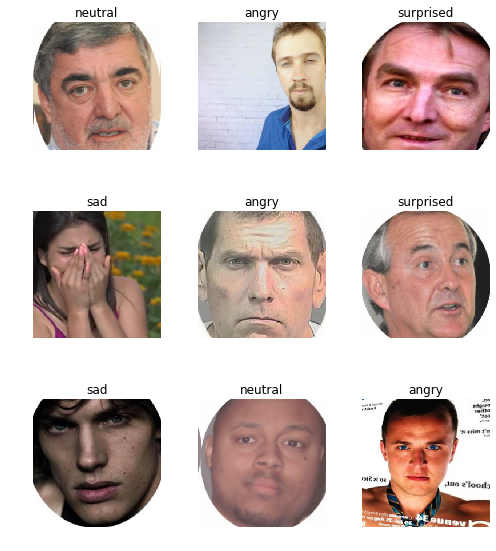

In [52]:
data.show_batch(rows=3, figsize=(7,8))

In [53]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['angry', 'happy', 'neutral', 'sad', 'scared', 'surprised'], 6, 1996, 499)

The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this, `ImageDataBunch.from_name_re` gets the labels from the filenames using a [regular expression](https://docs.python.org/3.6/library/re.html).

In [24]:
# fnames = get_image_files(path_img)
# fnames[:5]

NameError: name 'path_img' is not defined

In [54]:
print(data.classes)
len(data.classes),data.c

['angry', 'happy', 'neutral', 'sad', 'scared', 'surprised']


(6, 6)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 outputs).

We will train for 4 epochs (4 cycles through all our data).

In [55]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [56]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.952202,1.513960,0.551102
2,1.653246,1.432823,0.535070
3,1.467509,1.340788,0.480962
4,1.330986,1.337396,0.501002


In [57]:
learn.save('stage-1')

In [58]:
learn.unfreeze()

In [59]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


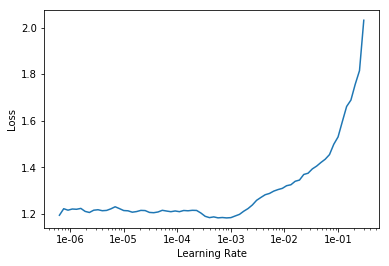

In [60]:
learn.recorder.plot()

In [61]:
lr = 0.003

In [62]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate
1,1.148095,1.449060,0.531062
2,1.148835,1.319610,0.458918
3,1.033693,1.171832,0.382766
4,0.857007,1.129125,0.392786
5,0.689019,1.102749,0.358717


In [63]:
learn.save('stage-2')

In [ ]:
#learn.model

In [26]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (263 items)
[Category happy, Category happy, Category happy, Category happy, Category happy]...
Path: data/train
x: ImageItemList (263 items)
[Image (3, 281, 500), Image (3, 339, 500), Image (3, 332, 500), Image (3, 300, 450), Image (3, 334, 300)]...
Path: data/train;

Valid: LabelList
y: CategoryList (65 items)
[Category sad, Category angryzip, Category happy, Category sad, Category disgustedzip]...
Path: data/train
x: ImageItemList (65 items)
[Image (3, 466, 500), Image (3, 1667, 2500), Image (3, 278, 500), Image (3, 500, 333), Image (3, 1080, 1920)]...
Path: data/train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
    

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

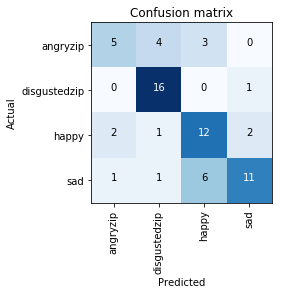

In [28]:
interp.plot_confusion_matrix()

In [29]:
learn.export()

# Cleaning the Data


In [42]:
from fastai.widgets import *


In [43]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Train)

In [44]:
ImageCleaner(ds, idxs, path)

'No images to show :)'

In [45]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)


Getting activations...


Computing similarities...


In [46]:
ImageCleaner(ds, idxs, path, duplicates=True)


'No images to show :). 3 pairs were skipped since at least one of the images was deleted by the user.'

Once you've cleaned the data, remake the DataBunch and retrain!

## Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
doc(interp.plot_top_losses)

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

In [ ]:
learn.load('stage-1');

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

That's a pretty accurate model!

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. It will be explained later in the course and you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [ ]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(8)

In [ ]:
learn.save('stage-1-50')

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

If it doesn't, you can always go back to your previous model.

In [ ]:
learn.load('stage-1-50');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused(min_val=2)

## Other data formats

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE); path

In [ ]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

In [ ]:
data.show_batch(rows=3, figsize=(5,5))

In [ ]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn.fit(2)

In [ ]:
df = pd.read_csv(path/'labels.csv')
df.head()

In [ ]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

In [ ]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [ ]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

In [ ]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

In [ ]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

In [ ]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

In [ ]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

In [ ]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes